# Doxorubicin addition test

In [1]:
using ProgressLogging
using OrdinaryDiffEq
using ModelingToolkit
using Plots
using DataFrames
using CSV
using ECMEDox
using ECMEDox: second, mM, Hz, μM
Plots.default(lw=2, size=(600, 600))

tend = 1000.0second
bcl = 1second
@named sys = build_model(; bcl, tend)
@unpack DOX, ρC4, ρC3 = sys
sts = unknowns(sys)
u0 = build_u0(sys)

62-element Vector{Pair{Symbolics.Num, Float64}}:
  sox_i(t) => 0.0009551938366685581
 h2o2_i(t) => 0.0007085981112491873
 gssg_i(t) => 2.092347017623283
    Q_n(t) => 1877.6012975036206
 Qdot_n(t) => 151.15043772121842
  QH2_n(t) => 35.91753587245618
  QH2_p(t) => 35.86290819940413
 Qdot_p(t) => 21.81190373831128
 cytb_1(t) => 209.8354978086165
 cytb_2(t) => 75.36600796391296
           ⋮
 ca_jsr(t) => 1265.5645352477409
  ca_ss(t) => 0.27469188451378845
   ca_m(t) => 1.118702765625523
  adp_i(t) => 152.965321024685
  adp_m(t) => 60.81807906669693
 nadh_m(t) => 1671.260518639995
   dpsi(t) => 153.61961418650026
  sox_m(t) => 5.188491782991169e-6
     vm(t) => -84.60049598496542

The phase transition (of the Q cycle) is between 250uM to 260uM of DOX

 18.755678 seconds (31.58 M allocations: 1.843 GiB, 5.06% gc time, 44.77% compilation time)


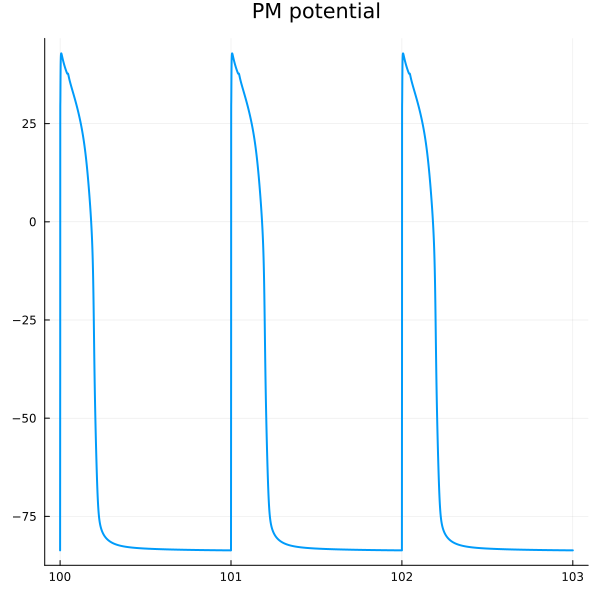

In [2]:
prob = ODEProblem(sys, u0, tend, [DOX => 250μM])
alg = FBDF()
opts = (; reltol=1e-6, abstol=1e-6, progress=true, maxiters=1e8)
@time sol = solve(prob, alg; opts...)
idxs = (sys.t/1000, sys.vm)
plot(sol, idxs=idxs, tspan=(100second, 103second), lab=false, title="PM potential")

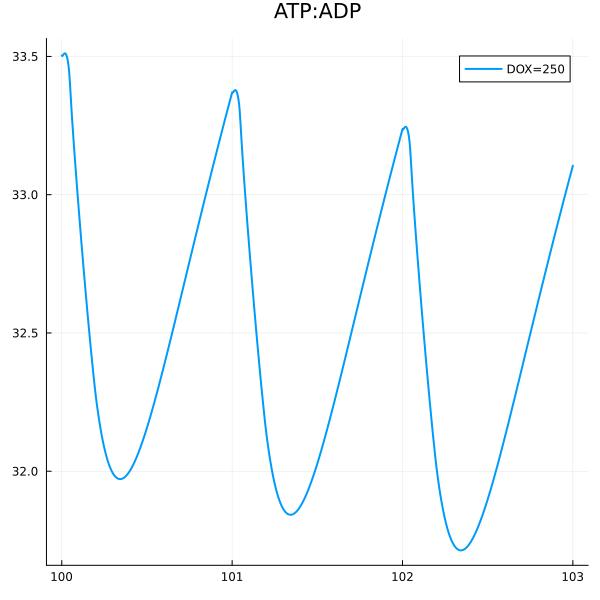

In [3]:
idxs = (sys.t/1000, [sys.atp_i / sys.adp_i])
plot(sol, idxs=idxs, tspan=(100second, 103second), lab="DOX=250", title="ATP:ADP")

In [4]:
prob0 = ODEProblem(sys, u0, tend, [DOX => 260μM, ρC4 => 325μM])
prob1 = ODEProblem(sys, u0, tend, [DOX => 260μM, ρC4 => 500μM])
prob2 = ODEProblem(sys, u0, tend, [DOX => 260μM, ρC3 => 500μM])
@time sol0 = solve(prob0, alg; opts...)
@time sol1 = solve(prob1, alg; opts...)
@time sol2 = solve(prob2, alg; opts...)

idxs = (sys.t/1000, sys.vm)

 11.968919 seconds (7.63 M allocations: 774.873 MiB, 2.19% gc time, 18.18% compilation time)
 23.962989 seconds (10.28 M allocations: 1.267 GiB, 4.31% gc time, 8.59% compilation time)
 13.945377 seconds (8.17 M allocations: 892.225 MiB, 1.99% gc time, 15.24% compilation time)


((1//1000)*t, vm(t))

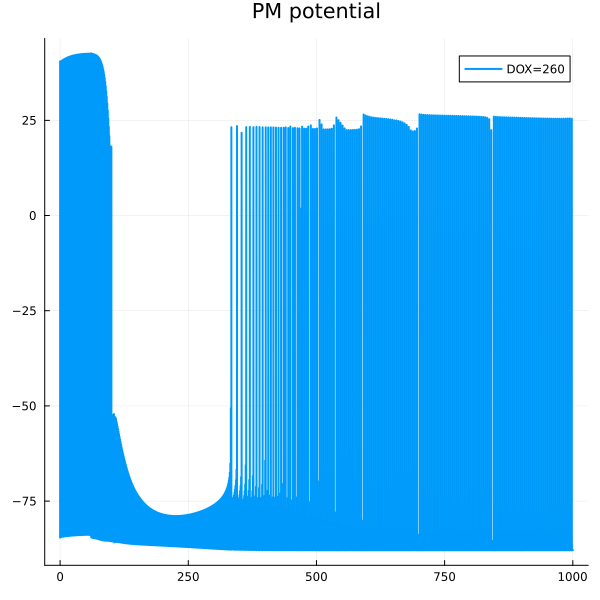

In [5]:
plot(sol0, idxs=idxs, lab="DOX=260", title="PM potential")

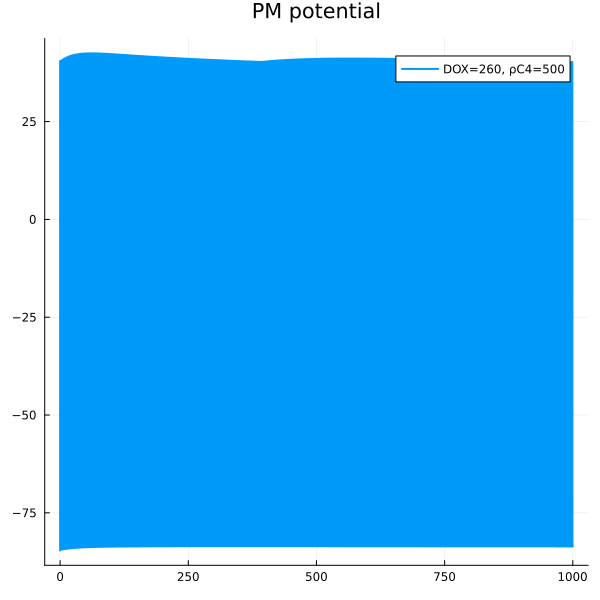

In [6]:
plot(sol1, idxs=idxs, lab="DOX=260, ρC4=500", title="PM potential")

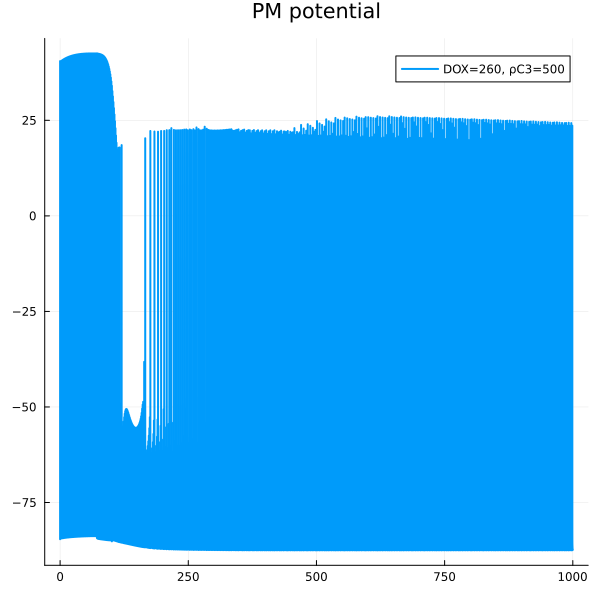

In [7]:
plot(sol2, idxs=idxs, lab="DOX=260, ρC3=500", title="PM potential")

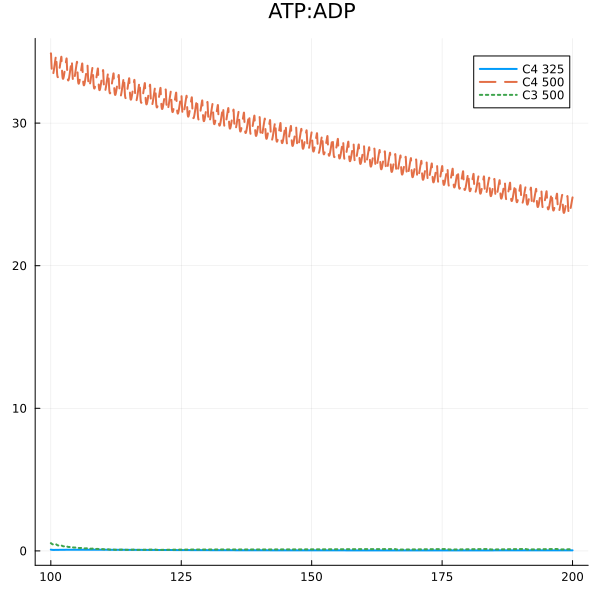

In [8]:
idxs = (sys.t/1000, [sys.atp_i / sys.adp_i])
tspan=(100second, 200second)
plot(sol0, idxs=idxs, label="C4 325", title="ATP:ADP"; tspan)
plot!(sol1, idxs=idxs, label="C4 500", line=:dash; tspan)
plot!(sol2, idxs=idxs, label="C3 500", line=:dot; tspan)

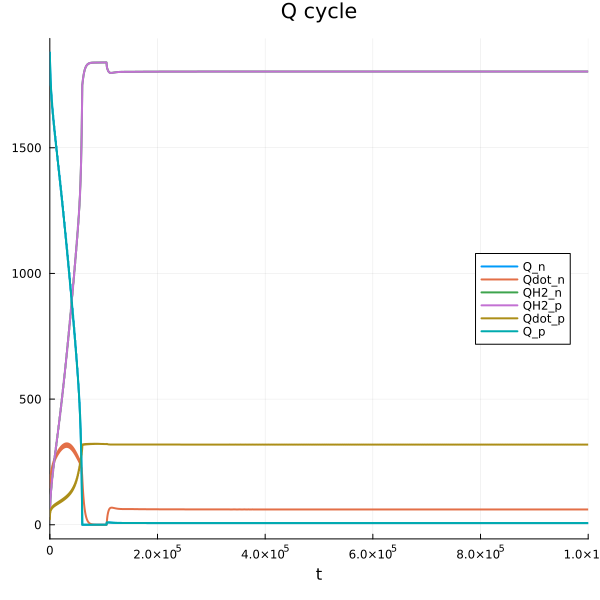

In [9]:
@unpack Q_n, Qdot_n, QH2_n, QH2_p, Qdot_p, Q_p, fes_ox, fes_rd, cytc_ox, cytc_rd = sys
plot(sol0, idxs=[Q_n, Qdot_n, QH2_n, QH2_p, Qdot_p, Q_p], title="Q cycle", legend=:right)

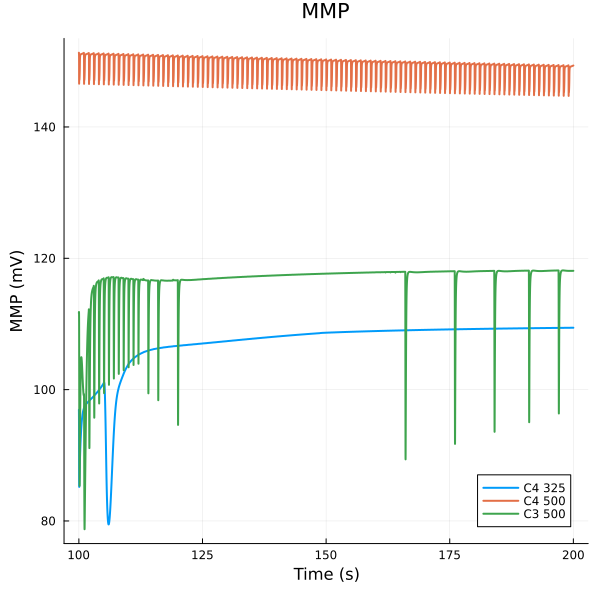

In [10]:
idxs = (sys.t/1000, sys.dpsi)
tspan=(100second, 200second)
plot(sol0, idxs=idxs, title="MMP", lab="C4 325" ; tspan)
plot!(sol1, idxs=idxs, label="C4 500"; tspan)
plot!(sol2, idxs=idxs, label="C3 500"; tspan, xlabel="Time (s)", ylabel="MMP (mV)")

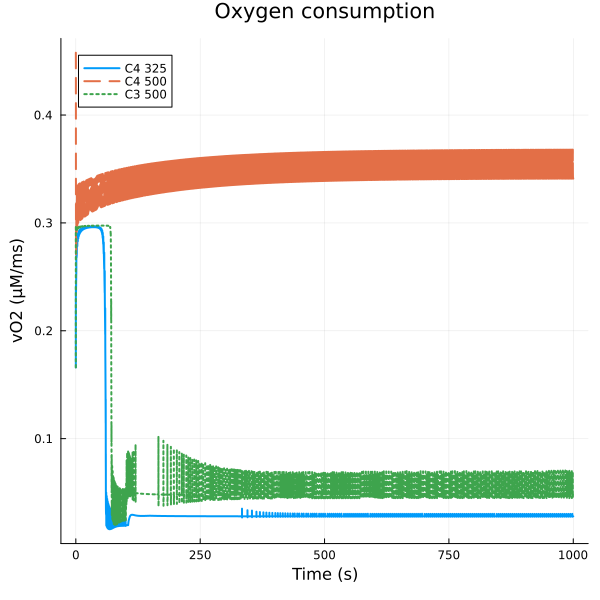

In [11]:
idxs = (sys.t/1000, sys.vO2)
plot(sol0, idxs=idxs, label="C4 325", title="Oxygen consumption")
plot!(sol1, idxs=idxs, label="C4 500", line=:dash)
plot!(sol2, idxs=idxs, label="C3 500", line=:dot, xlabel="Time (s)", ylabel="vO2 (μM/ms)")

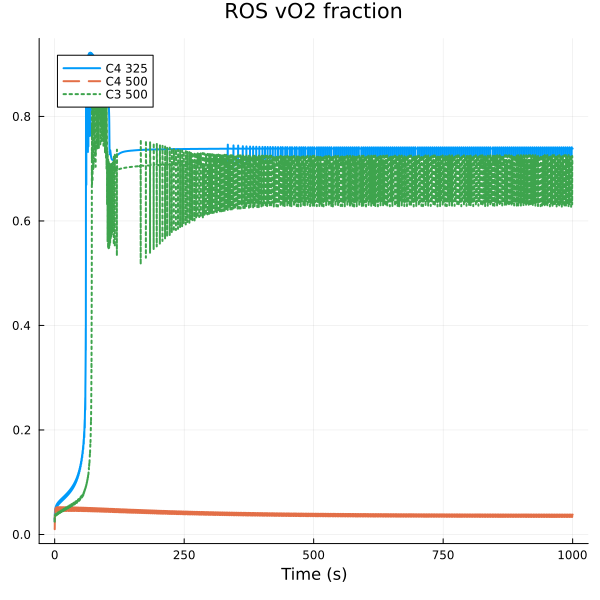

In [12]:
idxs = (sys.t/1000, sys.vROS / (sys.vO2 + sys.vROS))
plot(sol0, idxs=idxs, label="C4 325", title="ROS vO2 fraction")
plot!(sol1, idxs=idxs, label="C4 500", line=:dash)
plot!(sol2, idxs=idxs, label="C3 500", line=:dot, xlabel="Time (s)")

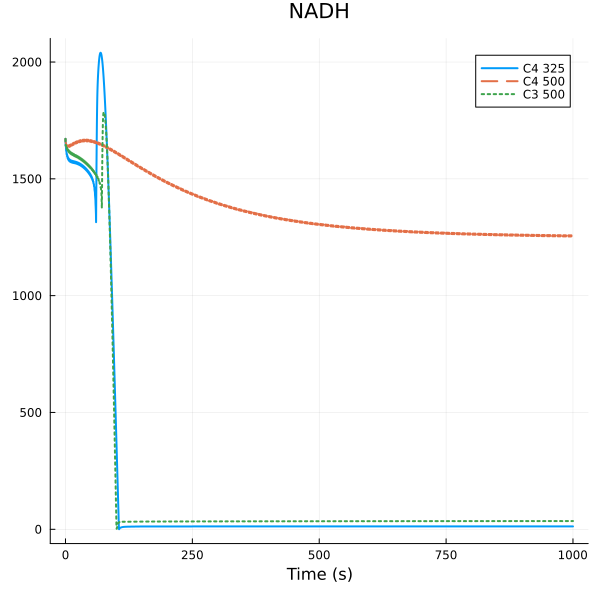

In [13]:
idxs = (sys.t/1000, sys.nadh_m)
plot(sol0, idxs=idxs, label="C4 325", title="NADH")
plot!(sol1, idxs=idxs, label="C4 500", line=:dash)
plot!(sol2, idxs=idxs, label="C3 500", line=:dot, xlabel="Time (s)")

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*